# 15 - Concrete Compressive Strength - Regression & Classification

## Libraries

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [4]:
df = pd.read_excel('Concrete_Data.xls')
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [5]:
## too lonng column names
df.columns = ['Cement', 'Slag', 'FlyAsh', 'Water', 'Plasticizer', 'CoarseAgg', 'FineAgg', 'Age', 'Strength']
df.columns

Index(['Cement', 'Slag', 'FlyAsh', 'Water', 'Plasticizer', 'CoarseAgg',
       'FineAgg', 'Age', 'Strength'],
      dtype='object')

## Problem 1:

In [7]:
from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
#pip install xgboost
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler


def algo_test(x,y):
        #Bütün modelleri tanımlıyorum
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        sgd=SGDRegressor()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        rkn=RadiusNeighborsRegressor(radius=1.0)
        ada=AdaBoostRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
        svr=SVR()
        mlp_regressor = MLPRegressor()

       
        
        algos=[L,R,Lass,E,sgd,ETR,GBR,ada,kn,dt,xgb,svr,mlp_regressor]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','SGD','Extra Tree','Gradient Boosting',
                    'KNeighborsRegressor','AdaBoost','Decision Tree','XGBRegressor','SVR','mlp_regressor']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        #Hata ve doğruluk oranlarını bir tablo haline getirmek için bir dataframe oluşturuyorum
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            

        #result adlı tabloya doğruluk ve hata oranlarımı yerleştiriyorum
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
       #oluşturduğum result tablosunu doğruluk oranına (r2_score) göre sıralayıp dönüyor
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [8]:
X = df.drop('Strength', axis=1)
y = df['Strength']

In [9]:
algo_test(X,y)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,R_Squared,RMSE,MAE
XGBRegressor,9.230752e-01,4.452198e+00,2.906828e+00
Gradient Boosting,8.820699e-01,5.512563e+00,4.087399e+00
mlp_regressor,8.137513e-01,6.927681e+00,5.564107e+00
Decision Tree,8.079798e-01,7.034200e+00,4.564202e+00
KNeighborsRegressor,7.641654e-01,7.795519e+00,6.560059e+00
Extra Tree,7.620766e-01,7.829966e+00,5.095739e+00
AdaBoost,7.367656e-01,8.235928e+00,6.451223e+00
ElasticNet,6.276324e-01,9.795514e+00,7.743307e+00
Lasso,6.275772e-01,9.796240e+00,7.743496e+00
Ridge,6.275418e-01,9.796706e+00,7.745389e+00


## Problem 2

In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [12]:
def green_classifier(s):
    if (s['Slag'] + s['FlyAsh'] < 150.0) and (s['Plasticizer'] < 10.0):
        return "n/a"
    else:
        return "green"

def strength_classifer(x):
    if x < 17.0:
        return "non-structural"
    elif x < 28.0:
        return "residential"
    elif x < 70.0:
        return "commercial"
    else:
        return "high-strength"

In [13]:
# Create new features
df["Green"] = df.apply(green_classifier, axis=1)
df["ConcreteClass"] = df['Strength'].apply(strength_classifer)

# Convert Plasticizer to text
df.Plasticizer = df.Plasticizer.apply(lambda x: "yes" if x > 0 else "no")
df.drop("Strength", axis=1, inplace=True)

## Deep Learning

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import  r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
model=Sequential()
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam', loss='mse')#mse regression

In [37]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), batch_size=128, epochs=150, verbose=1)

Epoch 1/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 42.4143 - val_loss: 53.4777
Epoch 2/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 47.8084 - val_loss: 50.7340
Epoch 3/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 38.1527 - val_loss: 40.8147
Epoch 4/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 34.1949 - val_loss: 39.6658
Epoch 5/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 30.9026 - val_loss: 37.8499
Epoch 6/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 33.6617 - val_loss: 51.5354
Epoch 7/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 31.1818 - val_loss: 53.2924
Epoch 8/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 34.7069 - val_loss: 89.7904
Epoch 9/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 70.9903 - val_loss: 91.5232
Epoch 10/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 59.3910 - val_loss: 121.1096
Epoch 11/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 75.4679 - val_loss: 43.5049
Epoch 12/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step 

In [39]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,531,141 (21.10 MB)

 Trainable params: 1,843,713 (7.03 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,687,428 (14.07 MB)

<Axes: >

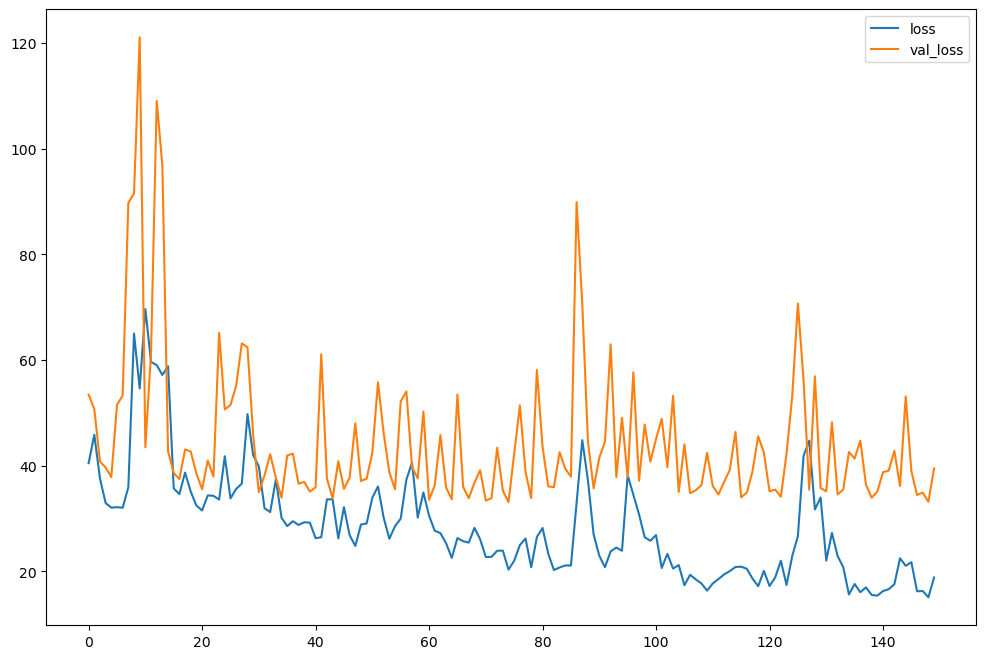

In [41]:
loss_df=pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

In [43]:
pred=model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [45]:
(mean_squared_error(y_test,pred))**.5

6.28378995869533

In [47]:
r2_score(y_test,pred) 

0.8467640115264269